In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
sns.set(style="whitegrid")

In [4]:
train_dir = 'C:\\Users\\Sakshi\\Downloads\\Telegram Desktop\\New folder\\New folder\\RiceLeafsDisease\\train'
validation_dir = 'C:\\Users\\Sakshi\\Downloads\\Telegram Desktop\\New folder\\New folder\\RiceLeafsDisease\\val'


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True
)

In [6]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 4745 images belonging to 4 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 592 images belonging to 4 classes.


In [9]:
train_class_distribution = pd.Series(train_generator.classes).value_counts()
class_names = list(train_generator.class_indices.keys())

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_36120\668417623.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=train_class_distribution, palette="viridis")


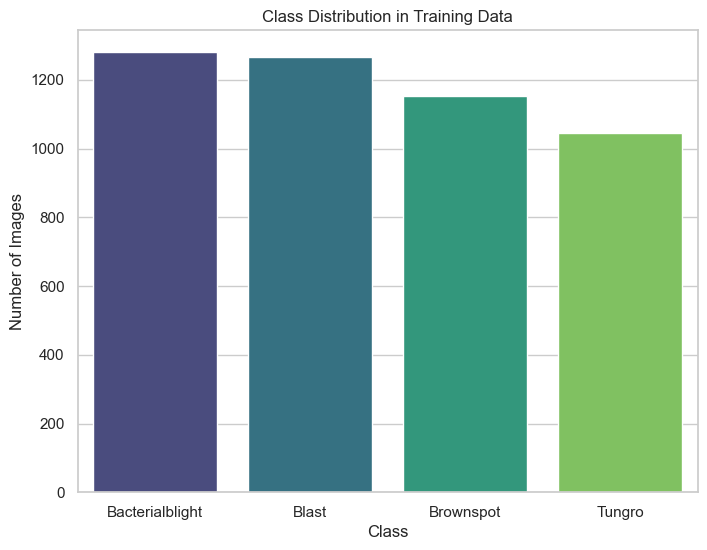

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x=class_names, y=train_class_distribution, palette="viridis")
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

In [11]:
model = Sequential()

In [12]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [14]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [15]:
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

In [18]:
model.add(Dense(train_generator.num_classes, activation='softmax'))

In [19]:
optimizer = Adam(learning_rate=0.001)

In [20]:
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=1e-6)

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,  # Increased number of epochs
    callbacks=[lr_reduction, early_stopping]
)

Epoch 1/20
148/148 [==============================] - 252s 2s/step - loss: 2.0086 - accuracy: 0.7276 - val_loss: 9.7933 - val_accuracy: 0.2830 - lr: 0.0010
Epoch 2/20
148/148 [==============================] - 134s 907ms/step - loss: 0.6034 - accuracy: 0.7963 - val_loss: 6.5023 - val_accuracy: 0.4045 - lr: 0.0010
Epoch 3/20
148/148 [==============================] - 142s 961ms/step - loss: 0.3875 - accuracy: 0.8617 - val_loss: 1.1399 - val_accuracy: 0.7066 - lr: 0.0010
Epoch 4/20
148/148 [==============================] - 161s 1s/step - loss: 0.3335 - accuracy: 0.8835 - val_loss: 0.4981 - val_accuracy: 0.8160 - lr: 0.0010
Epoch 5/20
148/148 [==============================] - 146s 980ms/step - loss: 0.2973 - accuracy: 0.8982 - val_loss: 0.2198 - val_accuracy: 0.9080 - lr: 0.0010
Epoch 6/20
148/148 [==============================] - 152s 1s/step - loss: 0.2798 - accuracy: 0.8999 - val_loss: 0.1757 - val_accuracy: 0.9358 - lr: 0.0010
Epoch 7/20
148/148 [==============================] - 2

In [24]:
epochs = range(1, len(history.history['accuracy']) + 1)

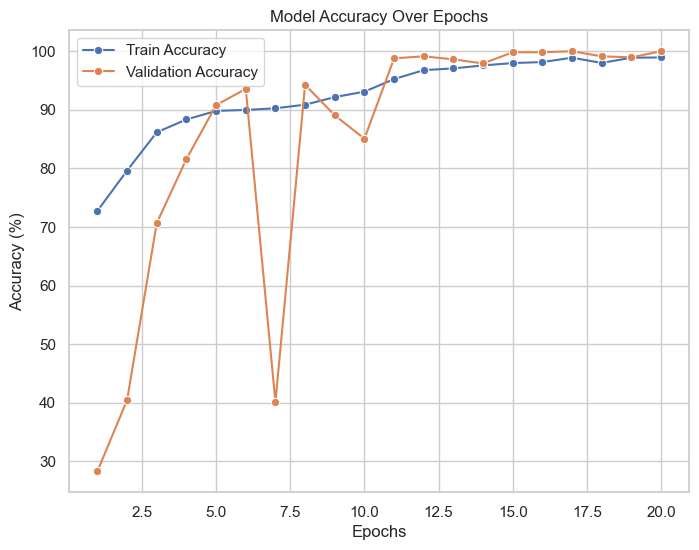

In [25]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=epochs, y=[x * 100 for x in history.history['accuracy']], label='Train Accuracy', marker='o')
sns.lineplot(x=epochs, y=[x * 100 for x in history.history['val_accuracy']], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

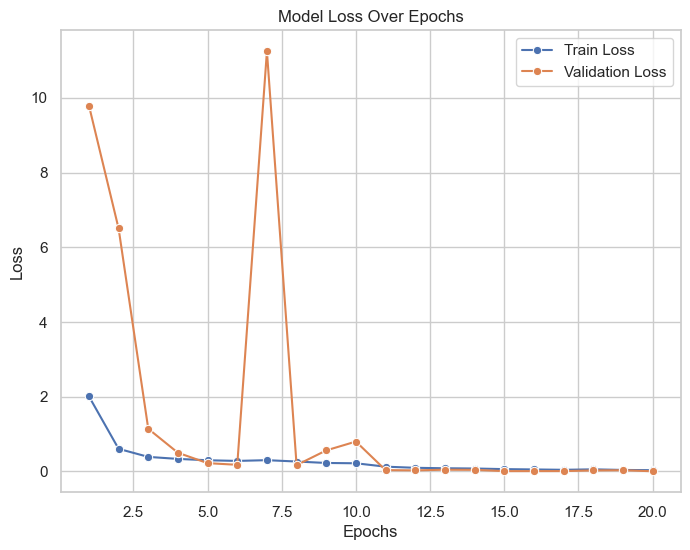

In [26]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=epochs, y=history.history['loss'], label='Train Loss', marker='o')
sns.lineplot(x=epochs, y=history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Model accuracy: {accuracy * 100:.2f}%")

19/19 [==============================] - 4s 186ms/step - loss: 0.0031 - accuracy: 1.0000
Model accuracy: 100.00%


In [28]:
model.save('advanced_rice_leaf_disease_model.h5')

C:\Users\Sakshi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
